In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns


In [29]:
customers = pd.read_csv('dataset/datas/customers.csv')
articles = pd.read_csv('dataset/datas/articles.csv')
transaction = pd.read_csv('dataset/datas/transactions_train.csv')


In [30]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [31]:
for col in articles.columns:
    print(col)

article_id
product_code
prod_name
product_type_no
product_type_name
product_group_name
graphical_appearance_no
graphical_appearance_name
colour_group_code
colour_group_name
perceived_colour_value_id
perceived_colour_value_name
perceived_colour_master_id
perceived_colour_master_name
department_no
department_name
index_code
index_name
index_group_no
index_group_name
section_no
section_name
garment_group_no
garment_group_name
detail_desc


No duplicate user

In [32]:
print('len(customers) = ', len(customers))
print('customers[\'customer_id\'].nunique()', customers['customer_id'].nunique())

len(customers) =  1371980
customers['customer_id'].nunique() 1371980


No duplicate articles

In [ ]:
print('len(articles) = ', len(articles))
print('articles[\'articles\'].nunique()', articles['article_id'].nunique())

len(customers) =  105542
customers['customer_id'].nunique() 105542


ladieswear occupie the most significant part of the articles

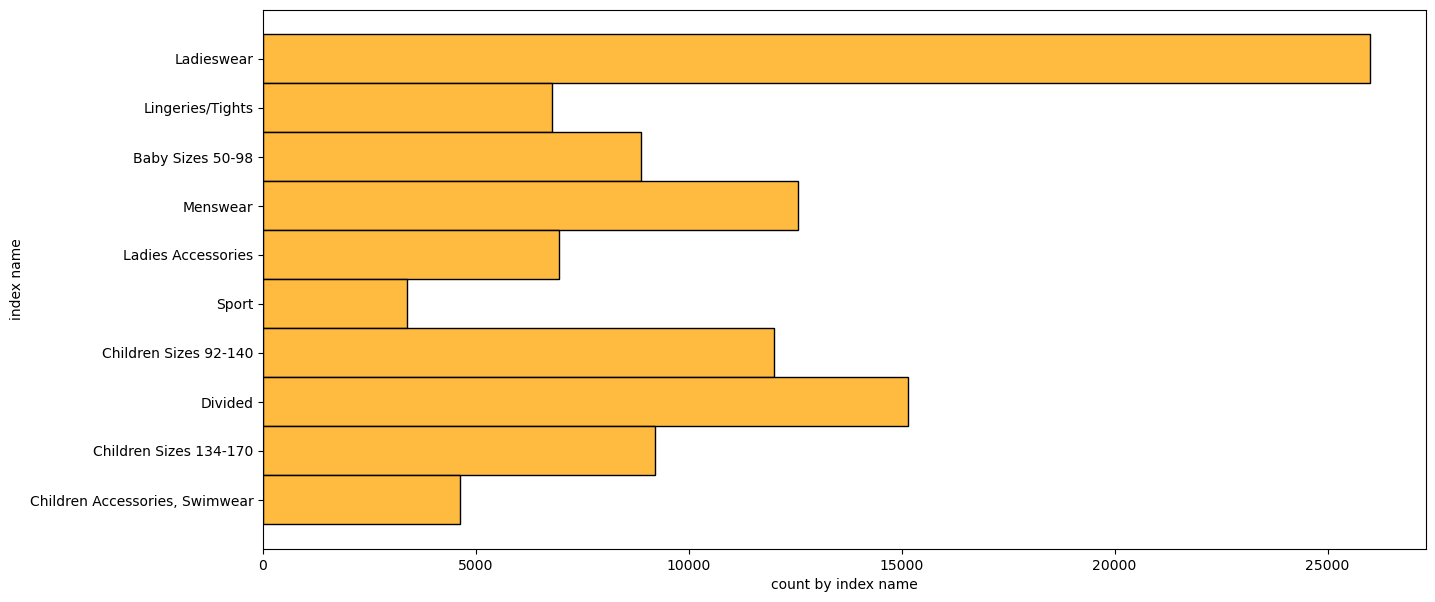

In [34]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

In [36]:
merged_df = pd.merge(transaction, articles, on='article_id', how='left')

The imbalance is even more important when it comes to transaction

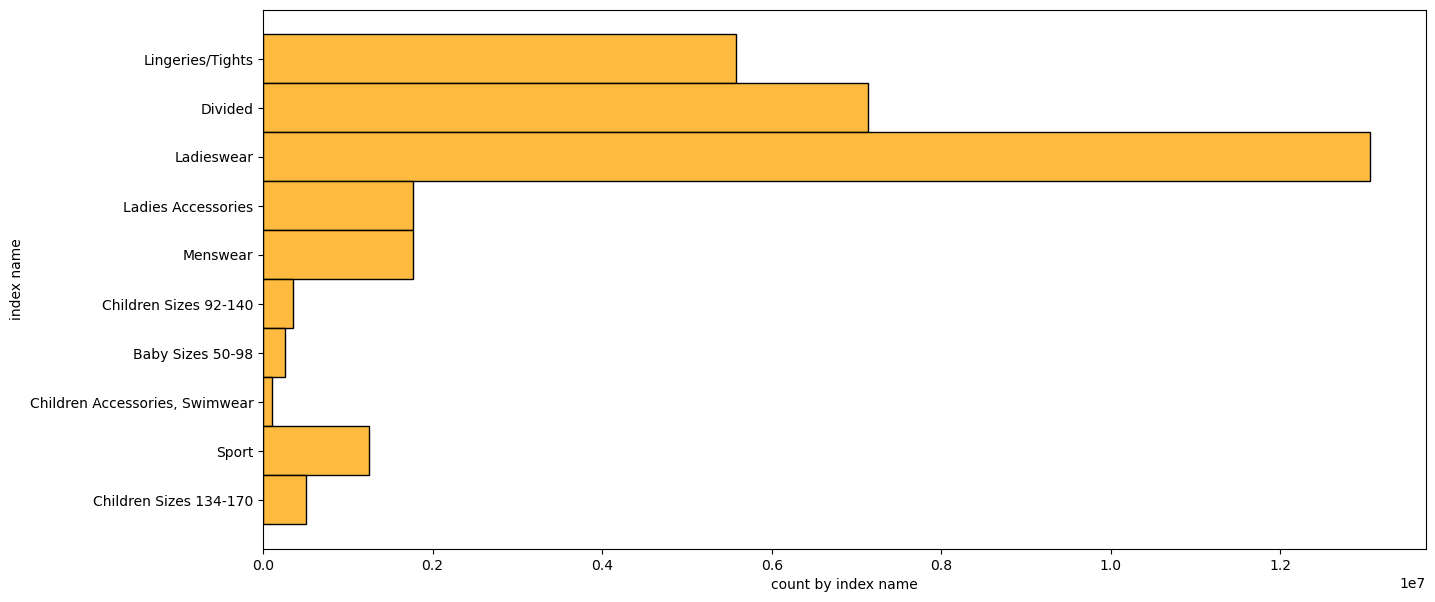

In [39]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=merged_df, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

lookup to categories and sub categories of product

In [40]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 45875
n of unique product_type_name: 131
n of unique product_group_name: 19
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique perceived_colour_value_name: 8
n of unique perceived_colour_master_name: 20
n of unique department_name: 250
n of unique index_name: 10
n of unique index_group_name: 5
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 43404


age distribution

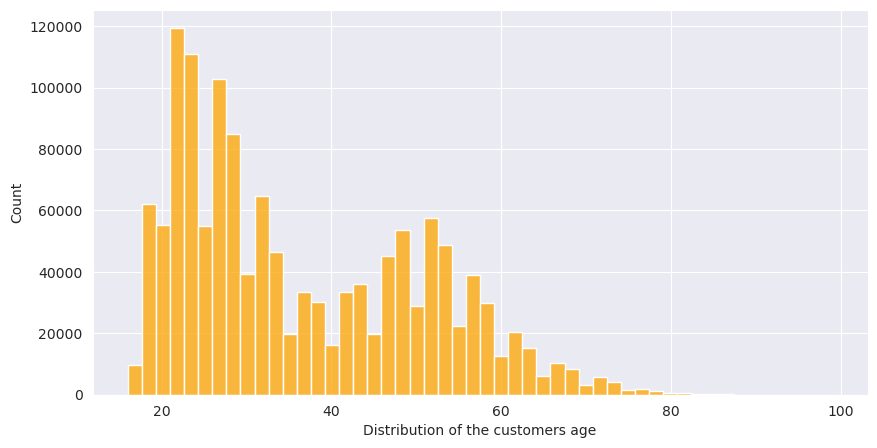

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')
plt.show()

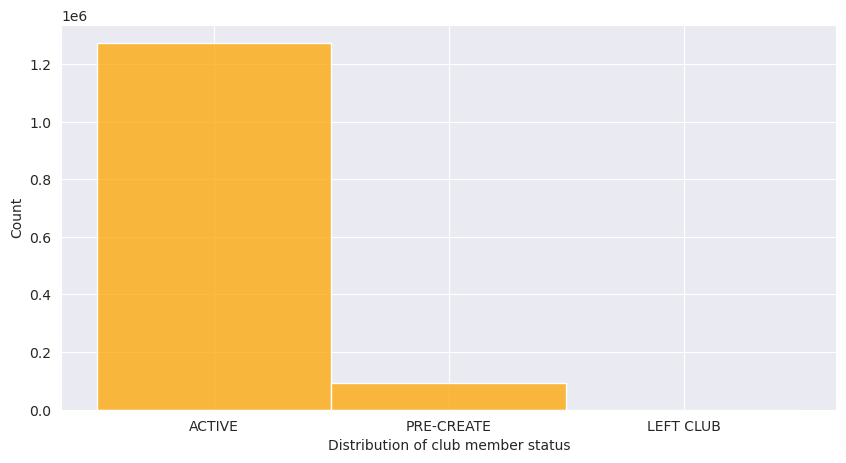

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

In [ ]:
status_counts = customers['club_member_status'].value_counts(dropna=False)
status_proportions = status_counts / len(customers)
status_proportions_df = status_proportions.reset_index()
status_proportions_df.columns = ['club_member_status', 'proportion']
print(status_proportions_df)

  club_member_status  proportion
0             ACTIVE    0.927485
1         PRE-CREATE    0.067756
2                NaN    0.004418
3          LEFT CLUB    0.000340


In [46]:
transactions_byid = transaction.groupby('customer_id').count()
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64

In [49]:
customer_x = transaction[transaction['customer_id'] == 'be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b']

Top consumer has 1895 order span on 2 years, av > 2 order / day !!

In [53]:
customer_x['t_dat'].sort_values()
# Ensure the column is datetime format
customer_x['t_dat'] = pd.to_datetime(customer_x['t_dat'])

# Get min and max
min_date = customer_x['t_dat'].min()
max_date = customer_x['t_dat'].max()

print("Min date:", min_date)
print("Max date:", max_date)


Min date: 2018-09-21 00:00:00
Max date: 2020-09-15 00:00:00


/tmp/ipykernel_10100/462061632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_x['t_dat'] = pd.to_datetime(customer_x['t_dat'])


average transaction per user

In [56]:
len(transaction) / len(customers)

23.16967011180921

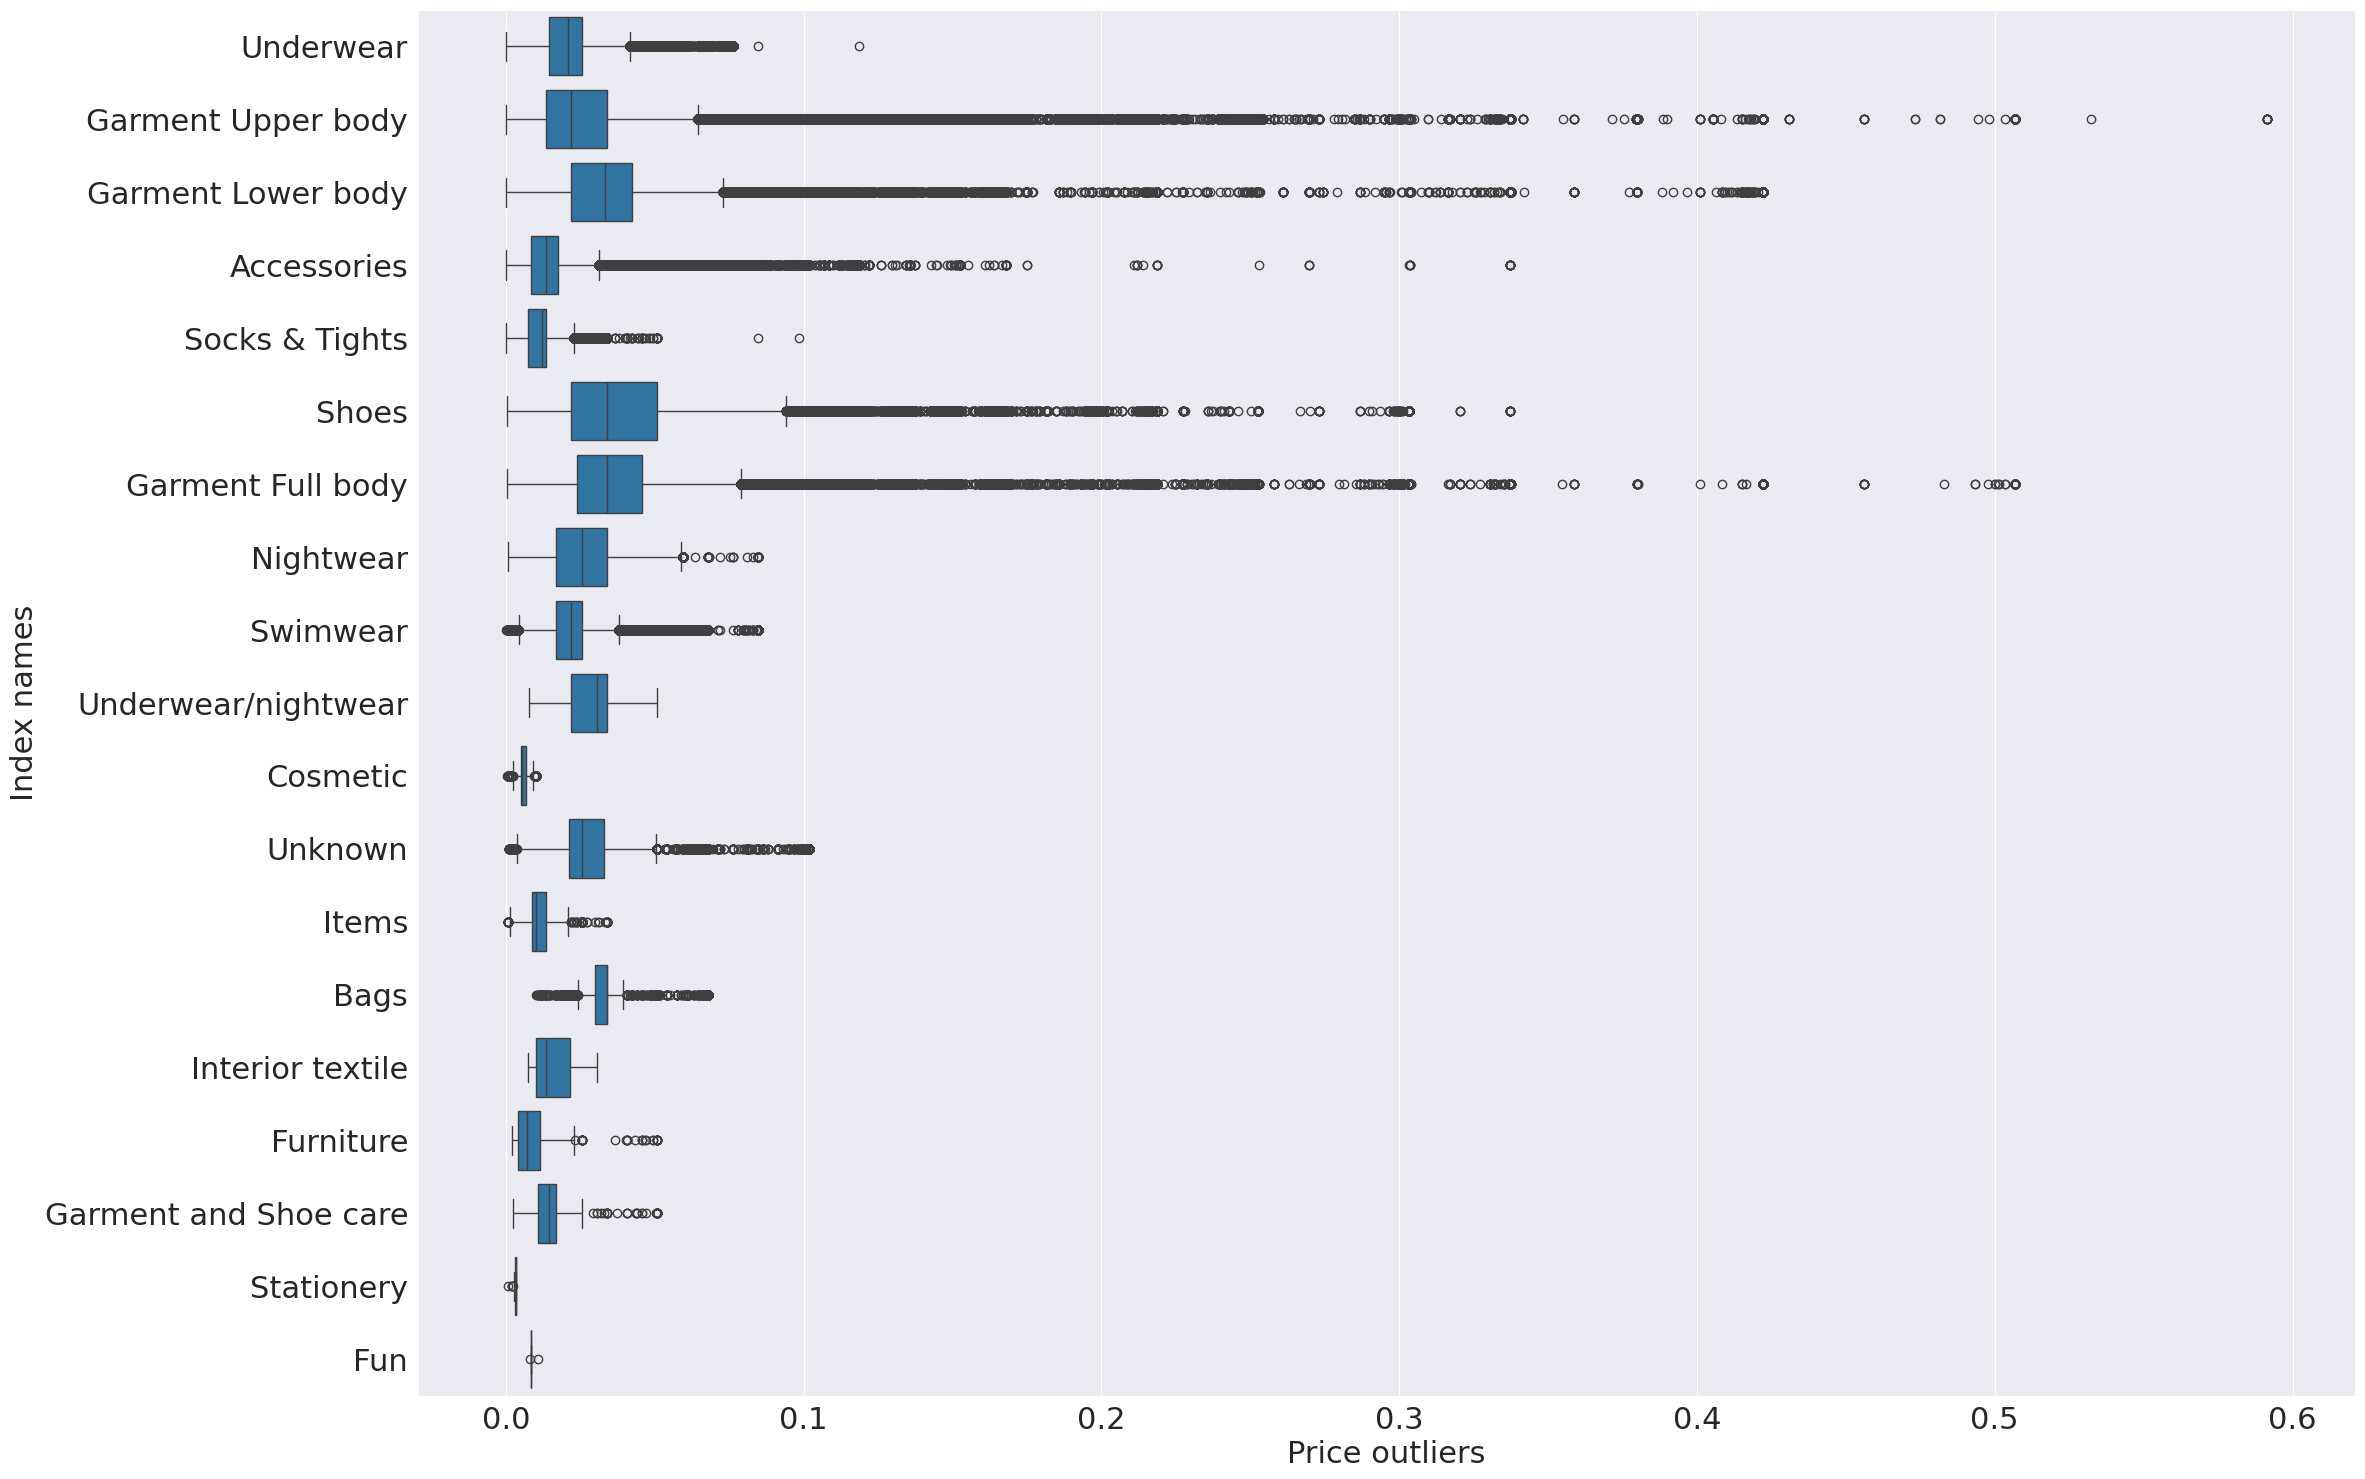

In [57]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=merged_df, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

It give me an idea, I want my score function to be a linear combination of tree component:
- Collaborative filtering to recommend items based on similar behaviour
- price Boost based on the assumption that complementary article are often less expensive than the original article
- co-purshased boost

TODO: 
- validate assumption for price
- define a co-purshased metric